# 柯西Cauchy分布噪声

In [68]:
#coding:utf-8
%matplotlib inline
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt
import cv2
from scipy import stats

In [69]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [70]:
def noise_cauchy(M,N,a = 0.,b = 1.):
    eps = 1.0e-7
    R = b / np.pi * (b ** 2 + (np.random.randn(M,N) - a) ** 2)
    return R

In [71]:
noise = noise_cauchy(src.shape[0],src.shape[1],0.15,6.5)

In [72]:
print(noise)

[[ 88.96745363  88.05180148  94.03056358 ...  88.56010342  93.03030124
   88.10500861]
 [ 87.72894972  87.69452343  87.42997923 ...  93.91035753  90.1436906
   87.4380192 ]
 [ 87.68951306  87.9692136   87.88931917 ...  88.86037163  87.41813639
   88.83964213]
 ...
 [ 87.90196804  88.63025038  92.22715561 ...  87.54536275  87.59572701
   87.67198786]
 [ 91.06202778  90.58253309  88.2777001  ...  88.18855319  87.43392362
   87.67228237]
 [100.19432221  91.92348323  87.76562878 ...  87.46370677  88.14989243
   87.89327221]]


In [73]:
noise_uint8 = cv2.convertScaleAbs(noise)
src_noise = np.zeros(src.shape,dtype=np.float64)
src_noise[:,:,0] = np.float64(src[:,:,0]) + noise
src_noise[:,:,1] = np.float64(src[:,:,1]) + noise
src_noise[:,:,2] = np.float64(src[:,:,2]) + noise

In [74]:
print(noise_uint8)

[[ 89  88  94 ...  89  93  88]
 [ 88  88  87 ...  94  90  87]
 [ 88  88  88 ...  89  87  89]
 ...
 [ 88  89  92 ...  88  88  88]
 [ 91  91  88 ...  88  87  88]
 [100  92  88 ...  87  88  88]]


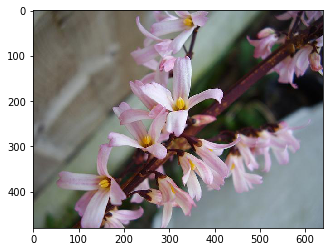

In [75]:
plt.imshow(src)

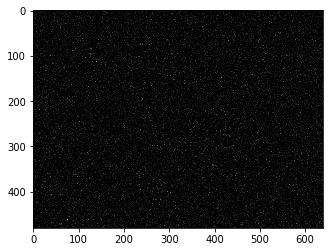

In [76]:
plt.imshow(noise_uint8,'gray')

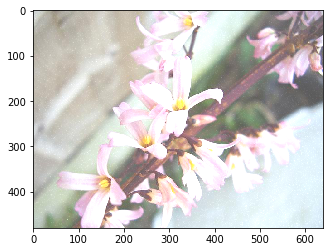

In [77]:
plt.imshow(cv2.convertScaleAbs(src_noise))